In [0]:
!pip install imgdiff

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install SSIM-PIL


In [0]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
import imgdiff as diff

In [0]:
img1 = '/content/drive/My Drive/COLAB/image/background1.jpg'
img2 = '/content/drive/My Drive/COLAB/image/background3.jpg'

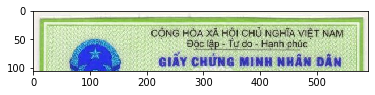

In [0]:
image1 = cv2.imread(img1)
image1 = cv2
plt.imshow(image1);


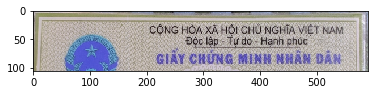

In [0]:
image2 = cv2.imread(img2)
plt.imshow(image2);

In [0]:
print(image1.size)
print(image2.size)

187938
187938


In [0]:
image1.shape

(106, 591, 3)

In [0]:
image2.shape

(106, 591, 3)

In [0]:
from SSIM_PIL import compare_ssim as ssim 

No module named 'pyopencl'. cl12 version by Christoph Gohlke for windows is recommended: https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyopencl


In [0]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err


In [0]:
def compare_images(imageA, imageB, title):
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)

	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")

	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")

	# show the images
	plt.show()

In [0]:
original = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

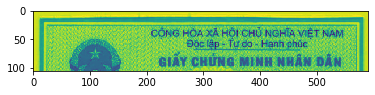

In [0]:
plt.imshow(original)

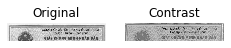

In [0]:
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast)

# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")

In [0]:
from PIL import Image, ImageChops


In [0]:
im1 = Image.open(img1)
im2 = Image.open(img2)

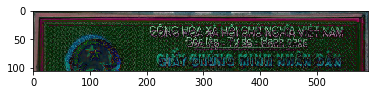

In [0]:
diff = ImageChops.difference(im1, im2)
if diff.getbbox():
  #diff.show()
  plt.imshow(diff)

In [0]:
# 3. Load the two input images
imageA = cv2.imread(img1)
imageB = cv2.imread(img2)

# 4. Convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# 5. Compute the Structural Similarity Index (SSIM) between the two
#    images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.07041997799114501
